# random forest regressor

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(10,5)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report,mean_absolute_error,r2_score

In [2]:
df=pd.read_csv(r"C:\Users\Sarvadnya\FUSIONCLASS\machine_learning\Boston.csv")
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
df.isna().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [5]:
df.isna().sum().sum()

np.int64(0)

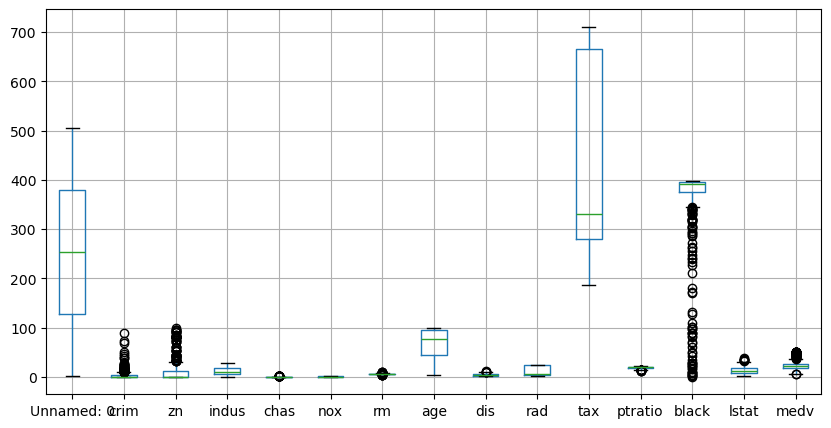

In [6]:
df.boxplot()
plt.show()

In [7]:
df['chas'].unique()

array([0, 1])

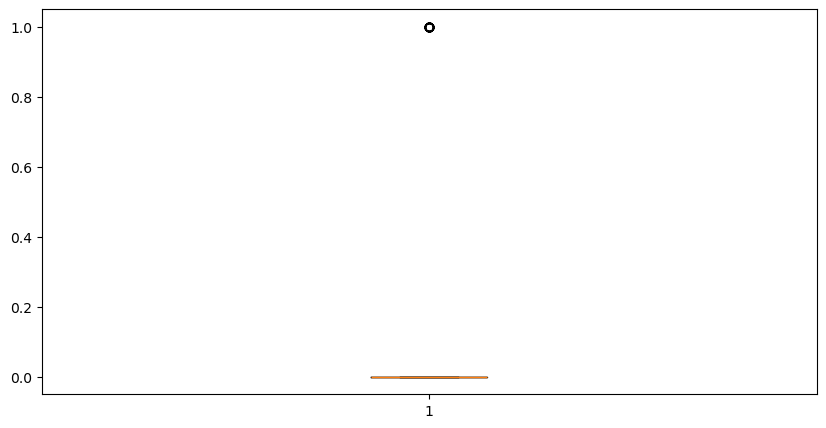

In [8]:
plt.boxplot(df['chas'])
plt.show()

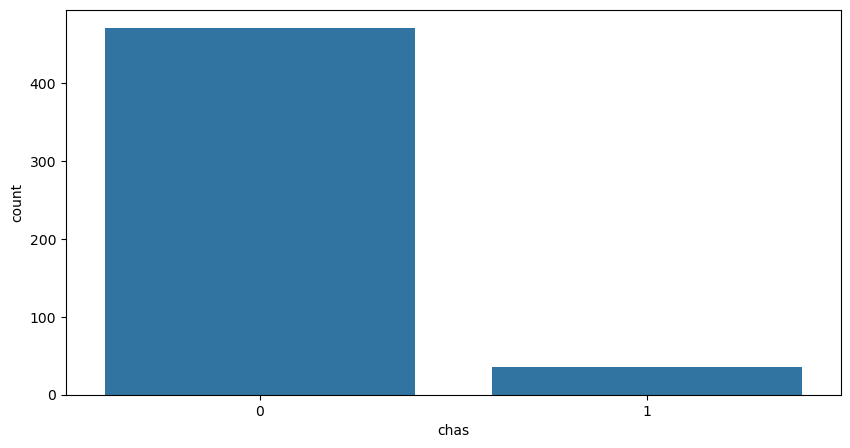

In [9]:
sns.countplot(x=df['chas'])
plt.show()

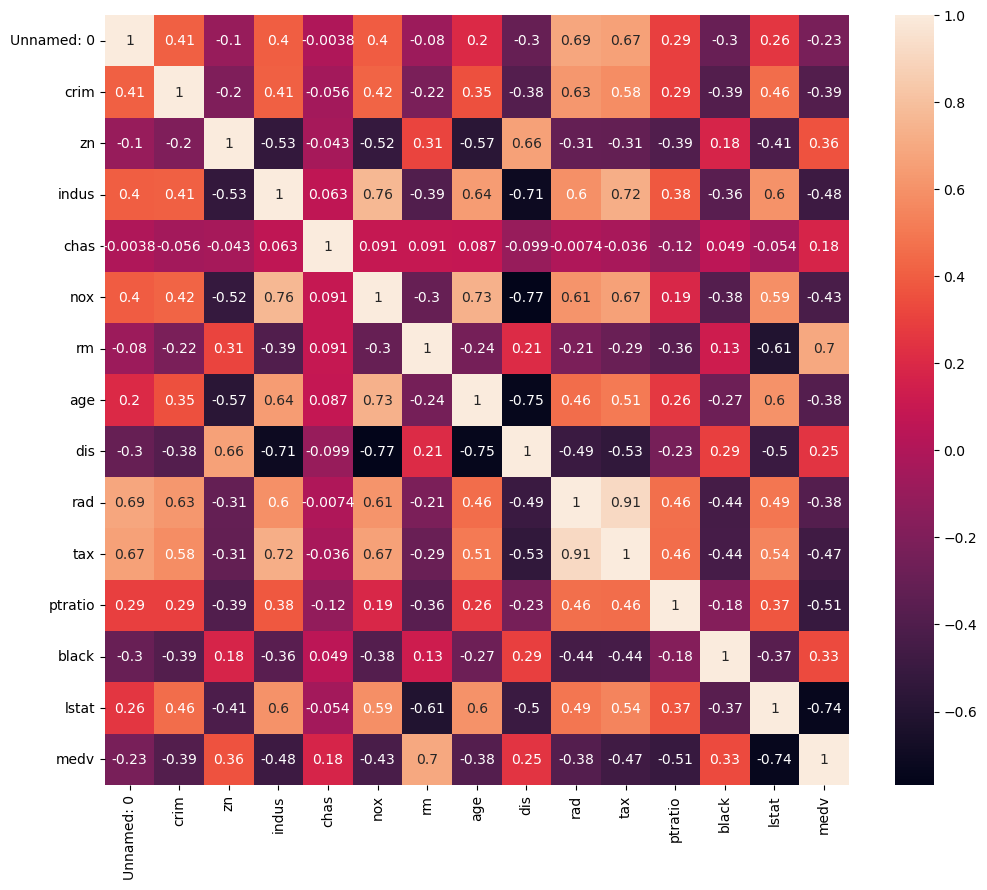

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [11]:
# model building

In [12]:
x=df.iloc[:,:-1]
y=df['medv']

In [13]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)
#model fit
rf=RandomForestRegressor(random_state=1)
rf.fit(xtrain,ytrain)
# prediction
yp=rf.predict(xtest)
yp

array([30.209, 27.592, 19.331, 20.961, 19.7  , 19.579, 27.388, 19.095,
       20.153, 23.499, 28.263, 30.118, 20.401, 20.285, 20.274, 24.568,
       12.686, 41.507, 24.494, 14.571, 19.777, 16.44 , 24.351, 23.626,
       25.821,  9.267, 14.298, 19.753, 43.526, 12.202, 25.476, 20.004,
       47.524, 16.251, 23.416, 20.749, 15.617, 34.017, 11.663, 19.518,
       24.19 , 23.198, 26.544, 16.123, 15.918, 10.88 , 47.034, 11.719,
       22.204, 19.067, 23.136, 21.3  , 24.756, 21.302, 10.552, 23.894,
       11.075, 22.801, 18.82 , 42.948, 14.138, 26.557, 13.333, 14.692,
       18.919, 33.061, 42.121, 24.968, 21.188, 20.245, 23.816,  7.118,
       18.938, 21.717, 19.7  , 20.27 , 42.9  , 24.711, 27.565, 32.933,
       17.116, 20.71 , 34.276, 11.342, 24.251, 25.594, 15.334, 24.528,
       19.934, 17.534, 28.301, 45.035, 15.623, 21.469, 14.666, 20.667,
       23.744, 23.501, 42.848, 20.702, 15.519, 16.201])

In [14]:
print(f'MSE:{mean_absolute_error(ytest,yp)}')
print(f'RMSE:{np.sqrt(mean_absolute_error(ytest,yp))}')
print(f'r2: {r2_score(ytest,yp)}')

MSE:2.2478039215686265
RMSE:1.4992677951482272
r2: 0.9166392384183251


In [15]:
# training ,testing accuracy
print(f'training accuracy:{rf.score(xtrain,ytrain)}')
print(f'testing accuracy:{rf.score (xtest,ytest)}')

training accuracy:0.9852246951093249
testing accuracy:0.9166392384183251


# hyperparameter tuning

In [22]:
params={
       'n_estimators' :[60,70],
        'criterion':['squared_error','absolute_error'],
         'max_depth':[7,9],
         'min_samples_split':[2,5,7,6],
         'min_samples_leaf':[5,7,8]
}
params

{'n_estimators': [60, 70],
 'criterion': ['squared_error', 'absolute_error'],
 'max_depth': [7, 9],
 'min_samples_split': [2, 5, 7, 6],
 'min_samples_leaf': [5, 7, 8]}

In [23]:
grid=GridSearchCV(RandomForestRegressor(random_state=1),param_grid=params,verbose=1)

In [24]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


,estimator,RandomForestR...andom_state=1)
,param_grid,"{'criterion': ['squared_error', 'absolute_error'], 'max_depth': [7, 9], 'min_samples_leaf': [5, 7, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,60


In [25]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 9,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 60}

In [26]:
rf=RandomForestRegressor(n_estimators=120,criterion='squared_error',max_depth=11,min_sample_leaf=5,min_sample_spilt=2)
rf.fit(xtrain,ytrain)

TypeError: RandomForestRegressor.__init__() got an unexpected keyword argument 'min_sample_leaf'. Did you mean 'min_samples_leaf'?